# Malin1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import poly1d, polyfit, power
import scipy.optimize
from math import *
from IPython.display import HTML
from IPython.display import Image
import os
import PIL as pil
import heapq
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.cm as cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Размер изображений
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 12

%matplotlib inline

# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.0.0
OS Windows 7 6.1.7601 SP1
numpy 1.10.4
scipy 0.17.0
matplotlib 1.5.1
Wed Jul 20 12:42:02 2016 RTZ 2 (зима)

In [2]:
incl=38.0
cos_i, sin_i = cos(incl * pi / 180), sin(incl * pi / 180)

## 1. Наблюдательные данные

In [3]:
os.chdir("..\\data\\malin1\\data-moisav")

In [4]:
gas_raw_data = np.loadtxt("malin1_pa200_gas.txt", float)

In [5]:
r_gas, v_Hbeta, e_VHbeta, sig_Hb, e_sigHb, v_OIII, e_vOIII, sig_OIII, e_sigOIII, _, _ = zip(*gas_raw_data)

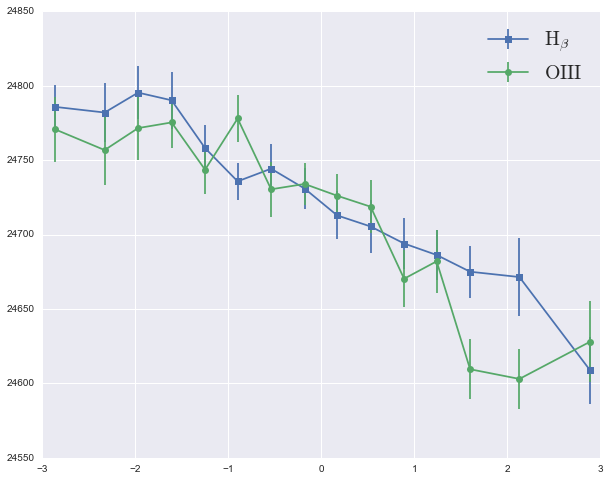

In [6]:
fig = plt.figure(figsize=[10, 8])
plt.errorbar(r_gas, v_Hbeta, yerr=e_VHbeta, label=r'$\rm{H}_{\beta}$', fmt='s-')
plt.errorbar(r_gas, v_OIII, yerr=e_vOIII, label=r'$\rm{OIII}$', fmt='o-')
plt.legend(fontsize=20)
plt.show()

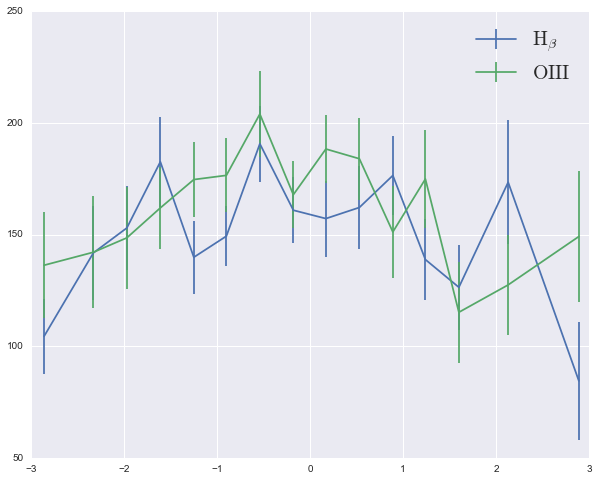

In [7]:
fig = plt.figure(figsize=[10, 8])
plt.errorbar(r_gas, sig_Hb, yerr=e_sigHb, label=r'$\rm{H}_{\beta}$')
plt.errorbar(r_gas, sig_OIII, yerr=e_sigOIII, label=r'$\rm{OIII}$')
plt.legend(fontsize=20)
plt.show()

In [8]:
star_raw_data = np.loadtxt("malin1_pa235_sn5.txt", float)
r_pa235_sn5, v_pa235_sn5, ev_pa235_sn5, sig_pa235_sn5, esig_pa235_sn5, _, _, _, _ = zip(*star_raw_data)

In [9]:
star_raw_data = np.loadtxt("malin1_pa235_sn8.txt", float)
r_pa235_sn8, v_pa235_sn8, ev_pa235_sn8, sig_pa235_sn8, esig_pa235_sn8, _, _, _, _ = zip(*star_raw_data)

In [10]:
star_raw_data = np.loadtxt("malin1_pa333_sn10.txt", float)
r_pa333_sn10, v_pa333_sn10, ev_pa333_sn10, sig_pa333_sn10, esig_pa333_sn10, _, _, _, _ = zip(*star_raw_data)

In [11]:
star_raw_data = np.loadtxt("malin1_pa333_sn5.txt", float)
r_pa333_sn5, v_pa333_sn5, ev_pa333_sn5, sig_pa333_sn5, esig_pa333_sn5, _, _, _, _ = zip(*star_raw_data)

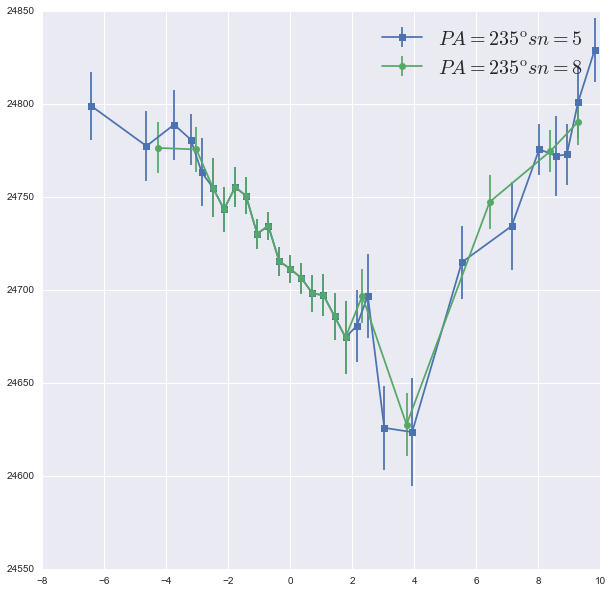

In [12]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(r_pa235_sn5, v_pa235_sn5, ev_pa235_sn5, label=r'$PA=235^{\rm{o}} sn=5$', fmt='s-')
plt.errorbar(r_pa235_sn8, v_pa235_sn8, ev_pa235_sn8, label=r'$PA=235^{\rm{o}} sn=8$', fmt='o-')
plt.legend(fontsize=20)
plt.show()

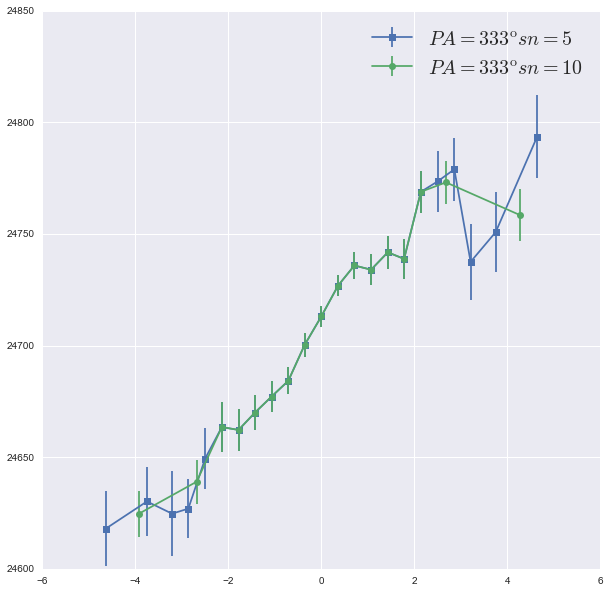

In [13]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(r_pa333_sn5, v_pa333_sn5, ev_pa333_sn5, label=r'$PA=333^{\rm{o}} sn=5$', fmt='s-')
plt.errorbar(r_pa333_sn10, v_pa333_sn10, ev_pa333_sn10, label=r'$PA=333^{\rm{o}} sn=10$', fmt='o-')
plt.legend(fontsize=20)
plt.show()

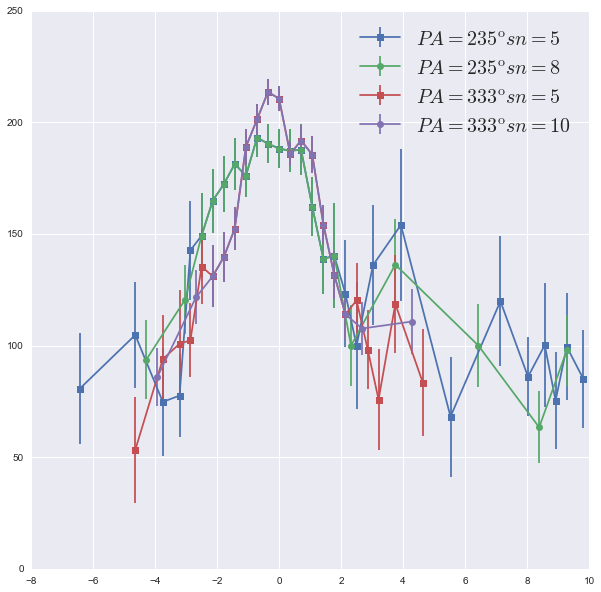

In [14]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(r_pa235_sn5, sig_pa235_sn5, esig_pa235_sn5, label=r'$PA=235^{\rm{o}} sn=5$', fmt='s-')
plt.errorbar(r_pa235_sn8, sig_pa235_sn8, esig_pa235_sn8, label=r'$PA=235^{\rm{o}} sn=8$', fmt='o-')
plt.errorbar(r_pa333_sn5, sig_pa333_sn5, esig_pa333_sn5, label=r'$PA=333^{\rm{o}} sn=5$', fmt='s-')
plt.errorbar(r_pa333_sn10, sig_pa333_sn10, esig_pa333_sn10, label=r'$PA=333^{\rm{o}} sn=10$', fmt='o-')
plt.legend(fontsize=20)
plt.show()

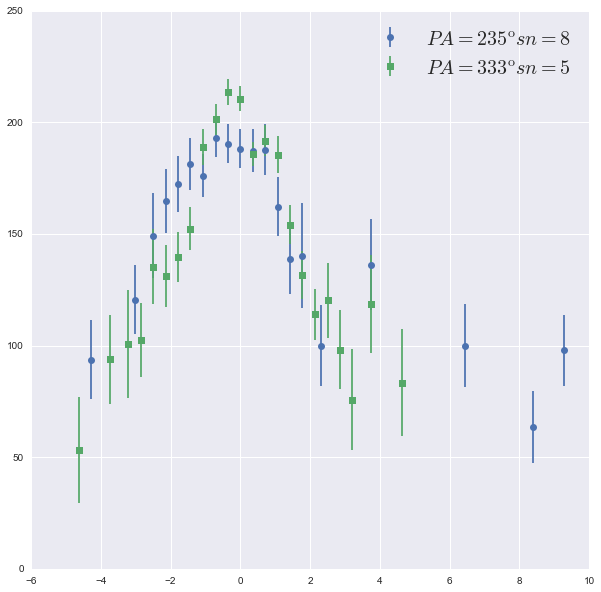

In [36]:
#see slide 19
fig = plt.figure(figsize=[10,10])
# plt.errorbar(r_pa235_sn5, sig_pa235_sn5, esig_pa235_sn5, label=r'$PA=235^{\rm{o}} sn=5$', fmt='s')
plt.errorbar(r_pa235_sn8, sig_pa235_sn8, esig_pa235_sn8, label=r'$PA=235^{\rm{o}} sn=8$', fmt='o')
plt.errorbar(r_pa333_sn5, sig_pa333_sn5, esig_pa333_sn5, label=r'$PA=333^{\rm{o}} sn=5$', fmt='s')
# plt.errorbar(r_pa333_sn10, sig_pa333_sn10, esig_pa333_sn10, label=r'$PA=333^{\rm{o}} sn=10$', fmt='o')
plt.legend(fontsize=20)
plt.show()

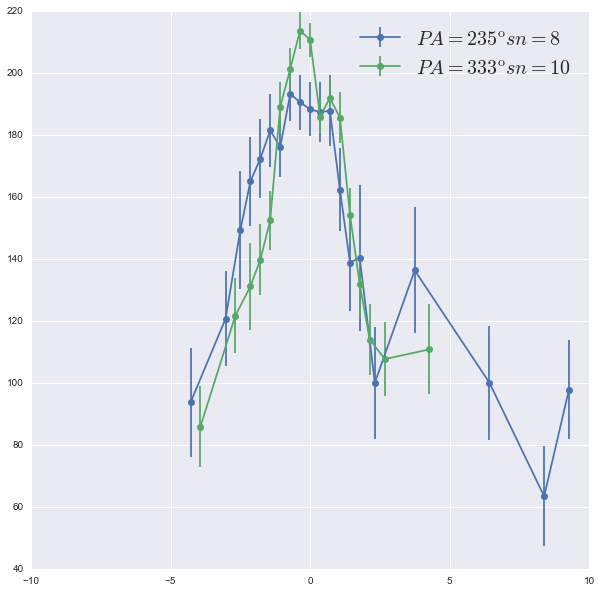

In [16]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(r_pa235_sn8, sig_pa235_sn8, esig_pa235_sn8, label=r'$PA=235^{\rm{o}} sn=8$', fmt='o-')
plt.errorbar(r_pa333_sn10, sig_pa333_sn10, esig_pa333_sn10, label=r'$PA=333^{\rm{o}} sn=10$', fmt='o-')
plt.legend(fontsize=20)
plt.xlim(-10,10)
plt.show()

In [17]:
#Размер изображений
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 12

#Наклон галактики по данным Засова 2012
incl=38.0

cos_i, sin_i = cos(incl * pi / 180), sin(incl * pi / 180)

#Эффективный радиус балджа
r_eb = 2.

235 - малая, 333 - большая

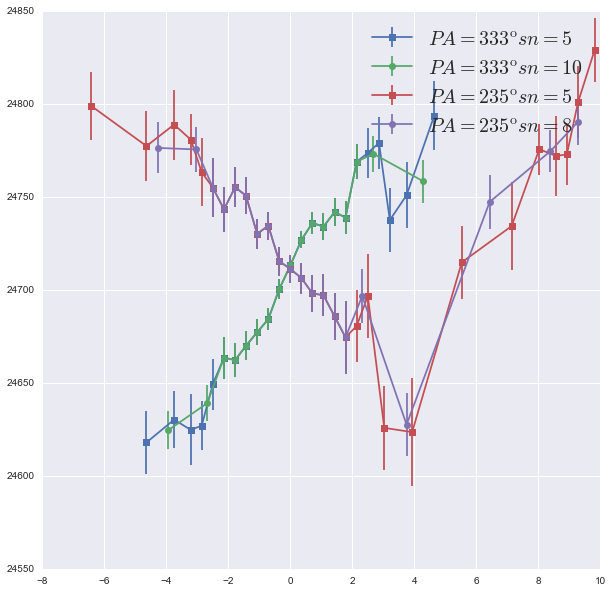

In [18]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(r_pa333_sn5, v_pa333_sn5, ev_pa333_sn5, label=r'$PA=333^{\rm{o}} sn=5$', fmt='s-')
plt.errorbar(r_pa333_sn10, v_pa333_sn10, ev_pa333_sn10, label=r'$PA=333^{\rm{o}} sn=10$', fmt='o-')
plt.errorbar(r_pa235_sn5, v_pa235_sn5, ev_pa235_sn5, label=r'$PA=235^{\rm{o}} sn=5$', fmt='s-')
plt.errorbar(r_pa235_sn8, v_pa235_sn8, ev_pa235_sn8, label=r'$PA=235^{\rm{o}} sn=8$', fmt='o-')
plt.legend(fontsize=20)
plt.show()

[]

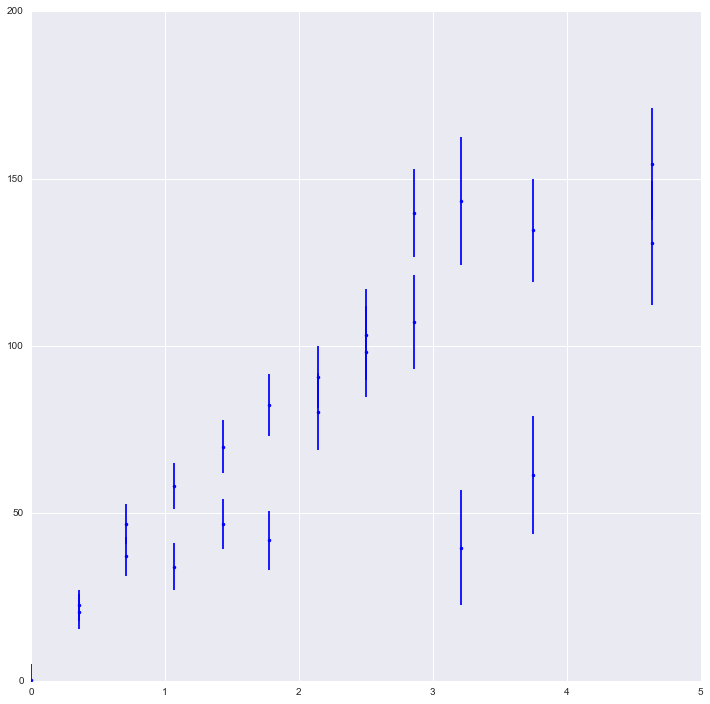

In [37]:
def incline_velocity(v, angle):
    return v / sin(angle * pi / 180)

# Переносит центр в (r0,v0) и перегибает кривую вращения, 
# а также исправляет за наклон если необходимо
def correct_rotation_curve(rdata, vdata, dvdata, r0, v0, incl):
    rdata_tmp = [abs(r-r0) for r in rdata]
    vdata_tmp = [incline_velocity(abs(v-v0), incl) for v in vdata]
    data = zip(rdata_tmp, vdata_tmp, dvdata)
    data.sort()
    return zip(*data)

b_vel = 24713

r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_pa333_sn5, v_pa333_sn5, ev_pa333_sn5,  0.0, b_vel, incl)

plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue')
# plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend()
plt.plot()

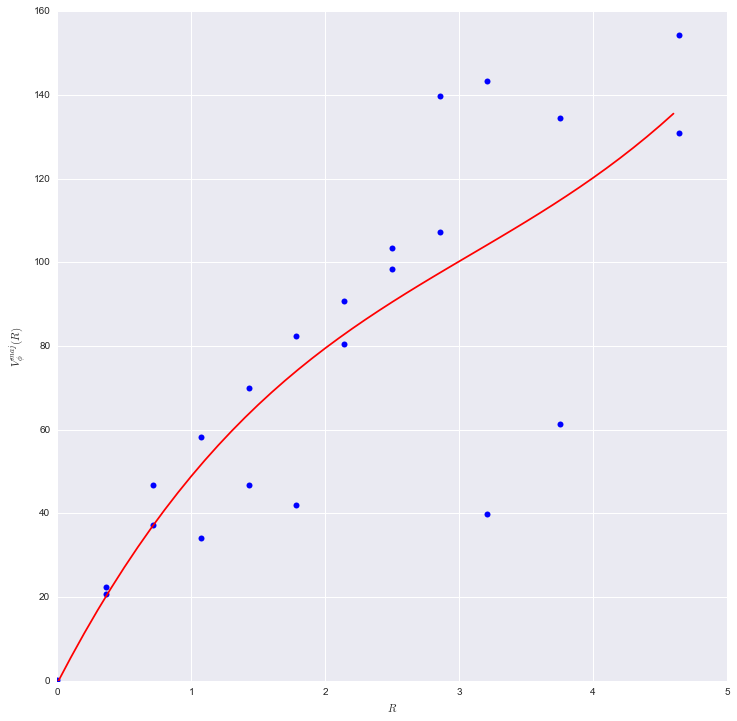

In [38]:
import scipy.interpolate as inter
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=3))
# poly_star = inter.UnivariateSpline (r_ma_b, vel_ma_b, k=3, s=10000.)

plt.plot(r_ma_b, vel_ma_b, 'o', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$')
plt.show()

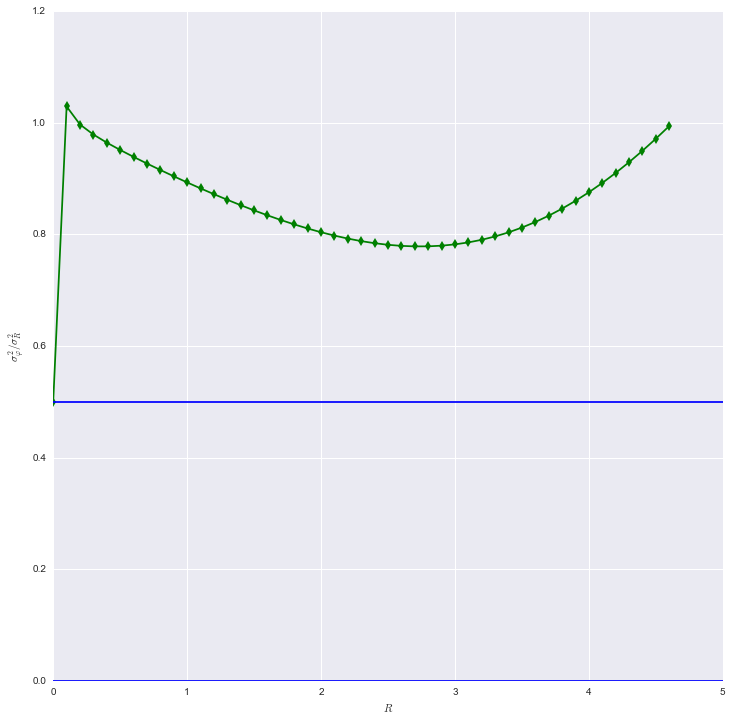

In [39]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*poly_star.deriv()(R) / poly_star(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

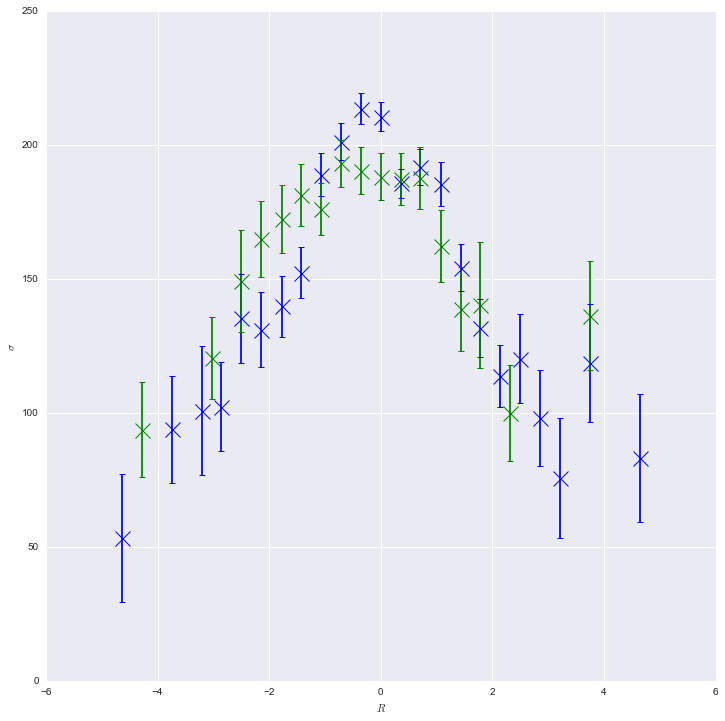

In [55]:
# def correct_min(R):    
#     return R / cos(incl * pi / 180) 

r_mi, sig_mi, e_sig_mi = r_pa235_sn8[:-3], sig_pa235_sn8[:-3], esig_pa235_sn8[:-3]
r_ma, sig_ma, e_sig_ma = r_pa333_sn5, sig_pa333_sn5, esig_pa333_sn5

# r_mi_extend = map(correct_min, r_mi)

plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='x', mew=1, color='blue', ms=15)
plt.errorbar(r_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='x', mew=1, color='green', ms=15)
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.xlim(-6, 6)
plt.show()

In [57]:
os.chdir("..\\olddata")

In [58]:
star_raw_data = np.loadtxt("MalinI_3.txt", float)
oldr_pa235, oldv_pa235, oldsig_pa235, oldev_pa235, oldesig_pa235 = zip(*star_raw_data)

In [59]:
star_raw_data = np.loadtxt("MalinI_2.txt", float)
oldr_pa333, oldv_pa333, oldsig_pa333, oldev_pa333, oldesig_pa333 = zip(*star_raw_data)

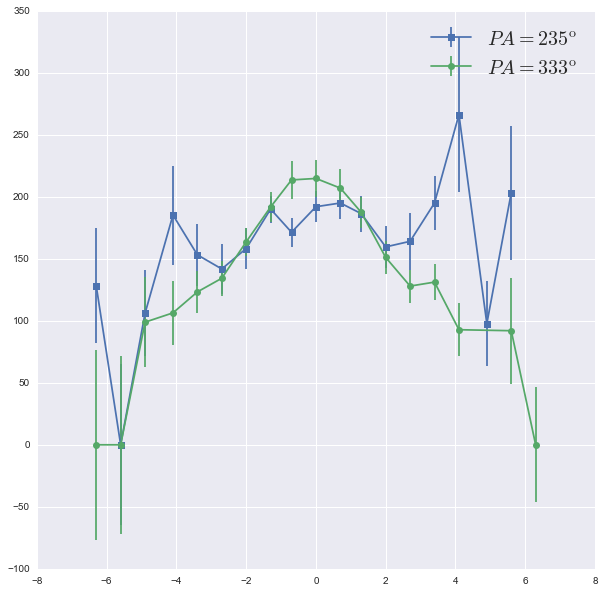

In [61]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(oldr_pa235, oldsig_pa235, oldesig_pa235, label=r'$PA=235^{\rm{o}}$', fmt='s-')
plt.errorbar(oldr_pa333, oldsig_pa333, oldesig_pa333, label=r'$PA=333^{\rm{o}}$', fmt='o-')
plt.legend(fontsize=20)
plt.show()

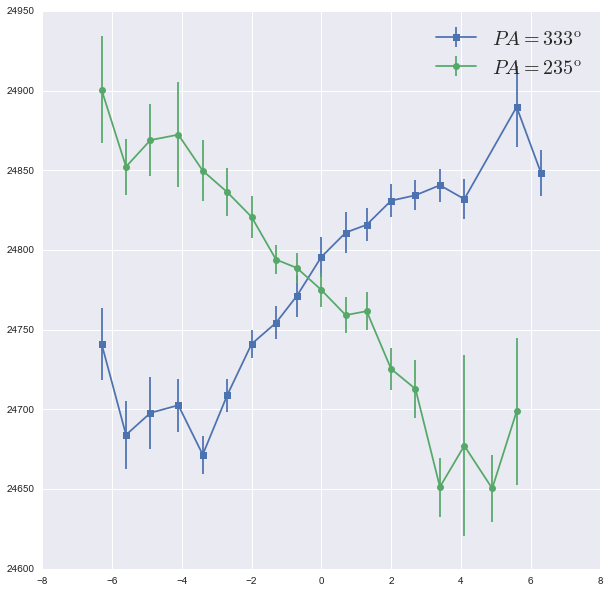

In [62]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(oldr_pa333, oldv_pa333, oldev_pa333, label=r'$PA=333^{\rm{o}}$', fmt='s-')
plt.errorbar(oldr_pa235, oldv_pa235, oldev_pa235, label=r'$PA=235^{\rm{o}}$', fmt='o-')
plt.legend(fontsize=20)
plt.show()

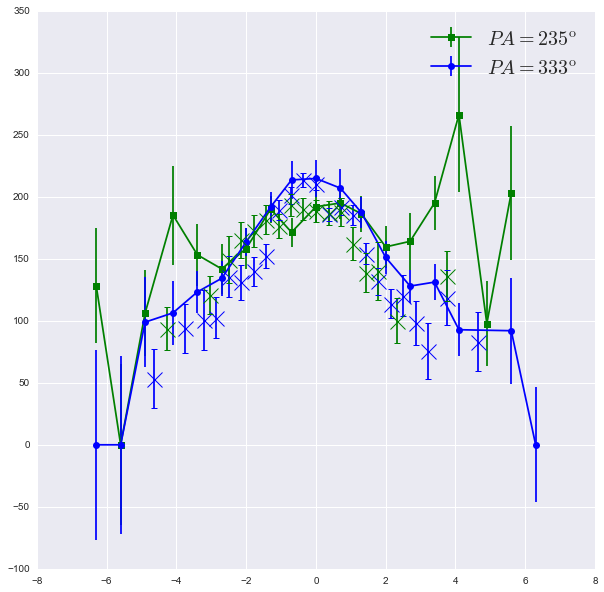

In [64]:
fig = plt.figure(figsize=[10,10])
plt.errorbar(oldr_pa235, oldsig_pa235, oldesig_pa235, label=r'$PA=235^{\rm{o}}$', fmt='s-', color='green')
plt.errorbar(oldr_pa333, oldsig_pa333, oldesig_pa333, label=r'$PA=333^{\rm{o}}$', fmt='o-', color='blue')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='x', mew=1, color='blue', ms=15)
plt.errorbar(r_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='x', mew=1, color='green', ms=15)

plt.legend(fontsize=20)
plt.show()

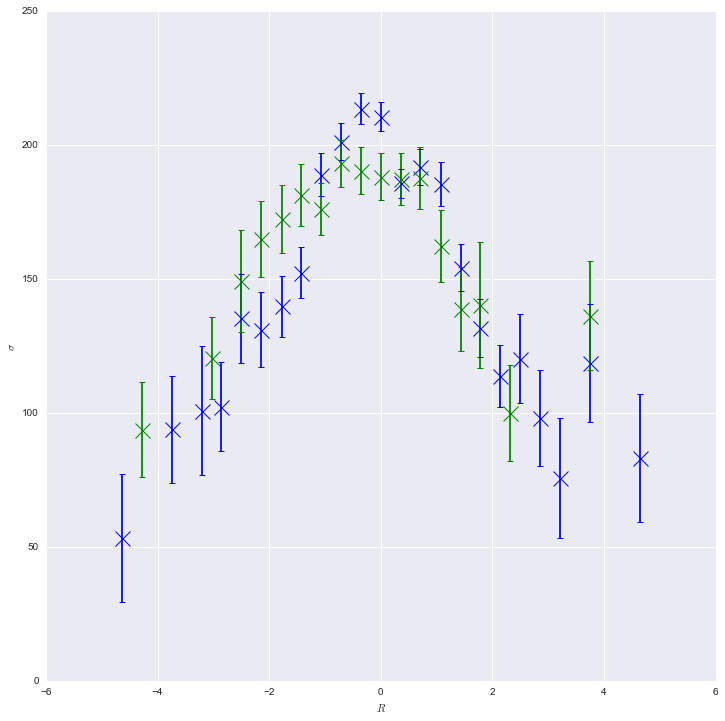

In [72]:
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='x', mew=1, color='blue', ms=15)
plt.errorbar(r_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='x', mew=1, color='green', ms=15)
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.xlim(-6, 6)
plt.show()

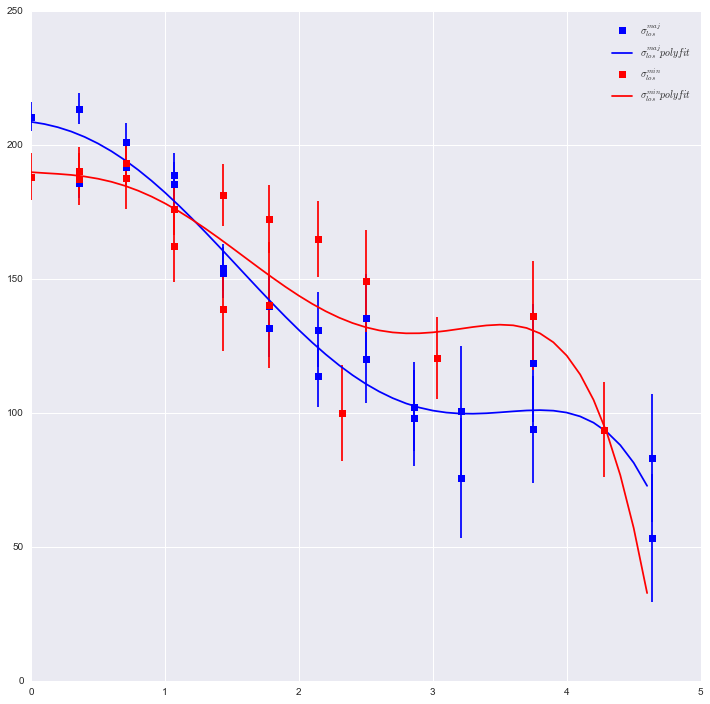

In [79]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
sig_maj_data = zip(r_ma, sig_ma, e_sig_ma)
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
radii_maj, sig_maj_p, e_sig_maj_p = zip(*sig_maj_data) 

poly_sig_maj = poly1d(polyfit(radii_maj, sig_maj_p, deg=5))

sig_min_data = zip(r_mi, sig_mi, e_sig_mi)
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
radii_min, sig_min_p, e_sig_min_p = zip(*sig_min_data) 

poly_sig_min = poly1d(polyfit(radii_min, sig_min_p, deg=5))

points = np.arange(0, max(radii_maj), 0.1)
plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')
plt.legend()
plt.ylim(0, 250)
plt.show()

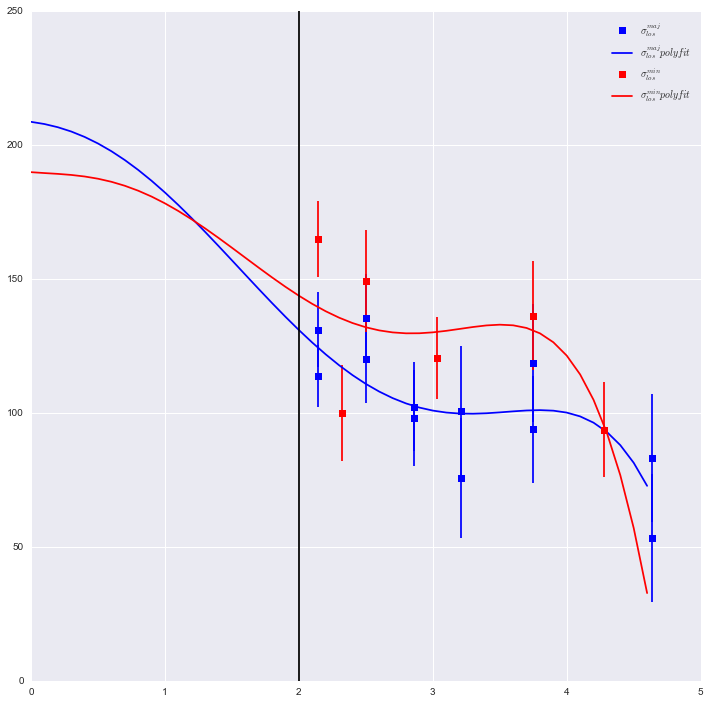

In [80]:
cutted = r_eb

sig_maj_data = zip(radii_maj, sig_maj_p, e_sig_maj_p)
sig_maj_data = filter(lambda l: l[0] > cutted, sig_maj_data)
radii_maj, sig_maj_p, e_sig_maj_p = zip(*sig_maj_data) 

sig_min_data = zip(radii_min, sig_min_p, e_sig_min_p)
sig_min_data = filter(lambda l: l[0] > cutted, sig_min_data)
radii_min, sig_min_p, e_sig_min_p = zip(*sig_min_data) 

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')
plt.axvline(x=cutted, color='black')
plt.legend()
plt.ylim(0, 250)
plt.show()

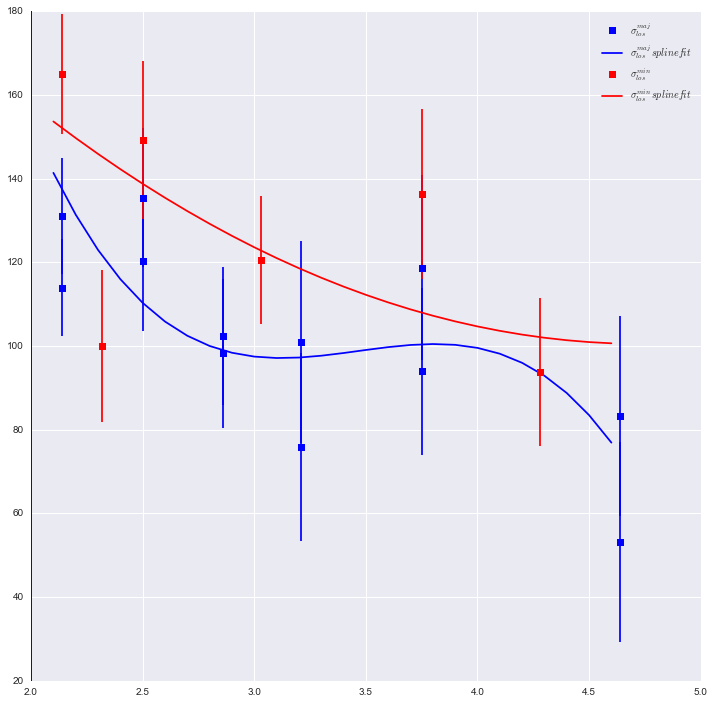

In [100]:
def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

points = filter(lambda l: l > cutted, points)

spl_maj = inter.UnivariateSpline (radii_maj[::-1], sig_maj_p[::-1], k=3, s=10000., w=w(e_sig_maj_p))
spl_min = inter.UnivariateSpline (radii_min, sig_min_p, k=2, s=10000., w=w(e_sig_min_p))

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, spl_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, spl_min(points), label = '$\sigma_{los}^{min}\, splinefit$', color='red')
plt.axvline(x=cutted, color='black')
plt.legend()
plt.show()

In [101]:
#Значение sig_los_min в cutted
# sig_min_0 = spl_min(cutted)
sig_min_0 = spl_min(0)

#Значение sig_R в cutted
sig_R_0 = 80.
# sig_R_0 = sig_min_0

alpha = 0.5

def sigR_exp(R):
    return sig_R_0*spl_min(R)/sig_min_0

def sigZ_exp(R):
    return alpha * sigR_exp(R)

def sigPhi_exp(R):
    return sigPhi_to_sigR(R) * sigR_exp(R)

In [103]:
def sig_maj_exp(R):
    return sig_R_0*spl_min(R)/sig_min_0 * sqrt(sigPhi_to_sigR_real(R) * sin_i**2 + alpha**2 * cos_i**2)

def sig_min_exp(R):
    return sig_R_0*spl_min(R)/sig_min_0 * sqrt(sin_i**2 + alpha**2 * cos_i**2)

In [108]:
alphas = np.arange(0.25, 1., 0.01)
sigmas = np.arange(100.0, 500, 0.25)

def calc_chi2_normal(obs, obserr, predicted):
    return sum([(o-p)**2/err**2 for (o,p,err) in zip(obs, predicted, obserr)])/len(obs)

def compute_chi2_maps(alphas=(), sigmas=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigmas), len(alphas)))
    image_maj = np.random.uniform(size=(len(sigmas), len(alphas)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    for i,si in enumerate(sigmas):
        for j,al in enumerate(alphas):
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
            sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
            sqerr_min = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
            sqerr_sum = 0.5*sqerr_maj+0.5*sqerr_min
            image[i][j] = sqerr_sum
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
    return image, image_maj, image_min


image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)
# pics_path = '.cutted\\pics\\'
# if not os.path.exists(pics_path):
#     os.makedirs(pics_path)
# if os.path.isfile(pics_path + 'chi2_map.npy'):
#     image = np.load(pics_path + "chi2_map.npy")
#     image_maj = np.load(pics_path + "chi2_map_maj.npy")
#     image_min = np.load(pics_path + "chi2_map_min.npy")
# else:
#     image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)
#     np.save(pics_path + 'chi2_map', image)
#     np.save(pics_path + 'chi2_map_maj', image_maj)
#     np.save(pics_path + 'chi2_map_min', image_min)

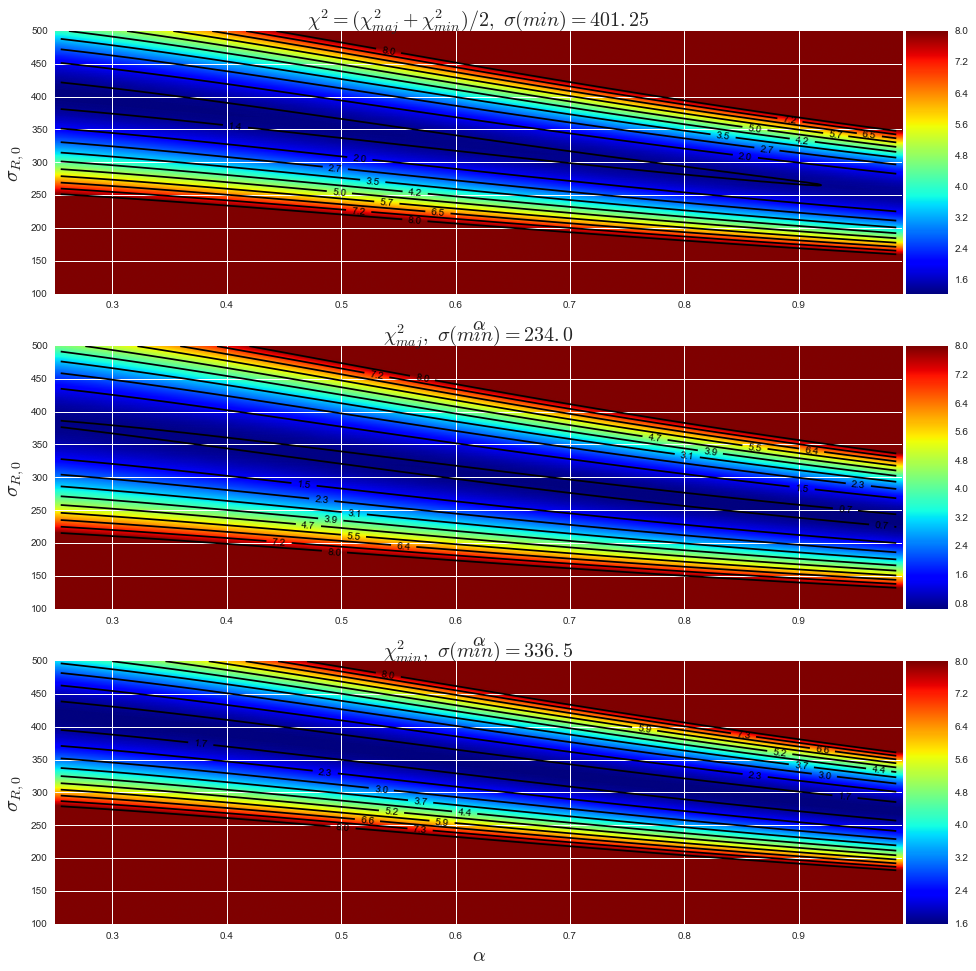

In [109]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    '''Рисуем получившиеся карты.
    Colormaps: http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps'''
    if image is not None:
        if log_scale:
            image_log = np.apply_along_axis(np.log, 1, image)
            vmax = image_log.max()
        else:
            image_log = image
        if is_contour:
            norm = plt.cm.colors.Normalize(vmax=image.max(), vmin=-image.max())
            cmap = plt.cm.PRGn
            levels = np.concatenate([np.array([image_log.min()*1.1,]), np.linspace(start=image_log.min(), stop=vmax, num=10)])
            levels = sorted(levels)
            cset=ax.contour(image_log, levels, hold='on', colors = 'k', origin='lower', 
                            extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
            ax.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
        im = ax.imshow(image_log, cmap='jet', vmin=image_log.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        min_sigma = sigmas[int(np.where(image == image.min())[0])]        
        ax.set_title(title + '$,\ \sigma(min)=%s$' % min_sigma, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
 
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[16,16])
plot_chi2_map(image, axes[0], log_scale=False, title='$\chi^2 = (\chi^2_{maj} + \chi^2_{min})/2$', is_contour=True, vmax=8.)
plot_chi2_map(image_maj, axes[1], log_scale=False, title='$\chi^2_{maj}$', is_contour=True, vmax=8.)
plot_chi2_map(image_min, axes[2], log_scale=False, title='$\chi^2_{min}$', is_contour=True, vmax=8.)
plt.show()

N1_maj=12,	 N2_min=6,	 chi^2_corr[0][0]=26.205972046 (was 35.3869417799 and 21.615487179)


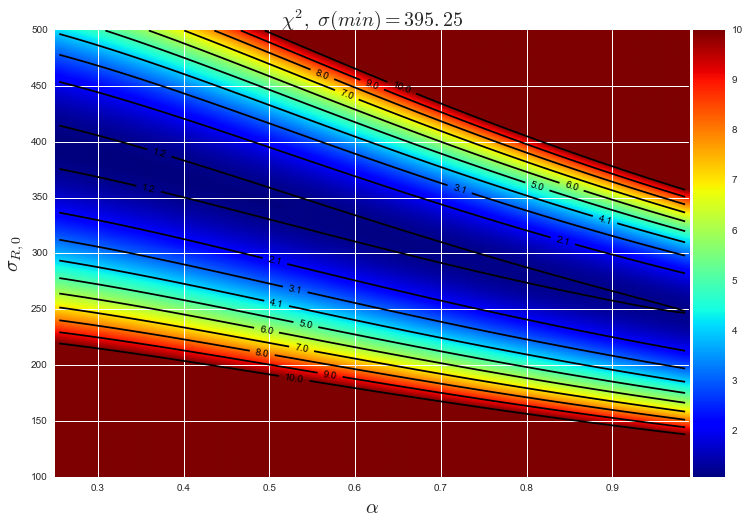

In [121]:
alphas = np.arange(0.25, 1., 0.01)
sigmas = np.arange(100.0, 500, 0.25)
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=[12,8])
corr_image = (image_min*len(sig_min_p) + image_maj*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p))
print 'N1_maj={},\t N2_min={},\t chi^2_corr[0][0]={} (was {} and {})'.format(len(sig_maj_p), len(sig_min_p), corr_image[0][0], 
                                                                            image_min[0][0], image_maj[0][0])
plot_chi2_map(corr_image, axes, log_scale=False, title='$\chi^2$', is_contour=True, vmax=10.)
plt.show()

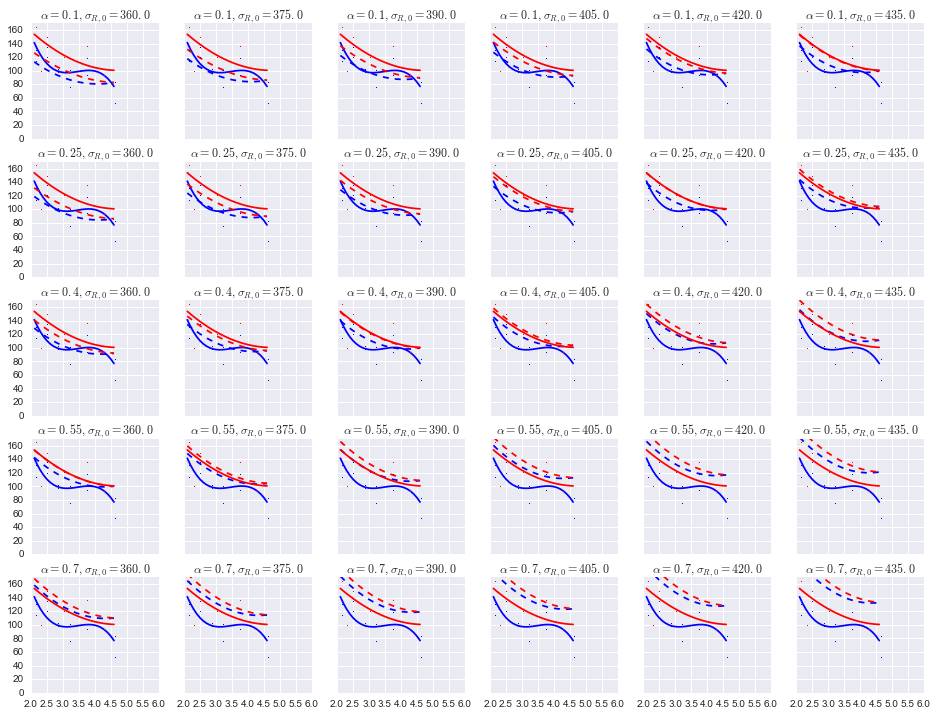

In [116]:
# Перебор alpha
alphas = np.arange(0.1, 0.85, 0.15)

# Перебор sig_R_0
sigmas = np.arange(360., 450., 15.)

# Те картинки, на которые стоит обратить особое внимание
good_pics = []

def plot_ranges(sigmas_range, alphas_range, good_pics=[], calc_chi=False, best_err=3):
    '''
    Для всех предложенных вариантов sigR и alpha
    рисует графики исходных и восстановленных дисперсий скоростей los.
    Если calc_chi = True, то также считает ошибку по наблюдаемым точкам.
    Если ошибка считается, то отмечаются best_err лучших (наименьших) результата.
    Синий - для большой оси, красный - малой, зеленый - полусумма.
    Изменяет глобальные значения sig_R_0 и alpha!'''
    nrows = alphas.size
    ncols = sigmas.size
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=[16,12])
    plt_index = 0
    # Последнее - среднее геометрическое
    sqerr_majs, sqerr_mins, sqerr_mean = [],[],[]
    for al in alphas_range:
        for si in sigmas_range:
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
            ax = axes[plt_index/ncols, plt_index % ncols]
            ax.set_title(r'$\alpha = %s, \sigma_{R,0}=%s$' % (al,si))
            ax.plot(points, spl_maj(points), '-', color='blue')
            ax.plot(points, [sig_maj_exp(Rr) for Rr in points], '--', color='blue')
            ax.plot(points, spl_min(points), '-', color='red')
            ax.plot(points, [sig_min_exp(R) for R in points], '--', color='red')
            ax.plot(radii_min, sig_min_p, 's', color='red', ms=1)
            ax.plot(radii_maj, sig_maj_p, 's', color='blue', ms=1)
            if calc_chi:
                sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
                sqerr_min = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
#                 sqerr_maj = sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data)
#                 sqerr_min = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data)
                ax.text(10, 5, "$\chi^2_{maj}=%5.3f\, \chi^2_{min}=%5.3f$" % (sqerr_maj, sqerr_min), fontsize=12)
                sqerr_majs.append(sqerr_maj);sqerr_mins.append(sqerr_min)
                sqerr_mean.append(0.5*sqerr_maj+0.5*sqerr_min)
            ax.set_ylim(0, 170)
            ax.set_xlim(cutted, 6)
            if (plt_index/ncols, plt_index % ncols) in good_pics:
                ax.plot([40], [200], 'o', markersize=12., color=(0.2,1.0,0.))
            plt_index = plt_index + 1
    if calc_chi:
        best_maj_err = heapq.nsmallest(best_err, sqerr_majs)
        for b_maj in best_maj_err:
            b_maj_ind = sqerr_majs.index(b_maj)
            ax = axes[b_maj_ind/ncols, b_maj_ind % ncols]
            #ax.plot([35], [200], 'o', markersize=12., color='b')
            ax.text(35, 140, "%s" % (best_maj_err.index(b_maj)+1), fontsize=12, color='b', 
                    bbox=dict(facecolor='none', edgecolor='b', boxstyle='round'))
        best_min_err = heapq.nsmallest(best_err, sqerr_mins)
        for b_min in best_min_err:
            b_min_ind = sqerr_mins.index(b_min)
            ax = axes[b_min_ind/ncols, b_min_ind % ncols]
            #ax.plot([30], [200], 'o', markersize=12., color='r')
            ax.text(30, 140, "%s" % (best_min_err.index(b_min)+1), fontsize=12, color='r', 
                    bbox=dict(facecolor='none', edgecolor='r', boxstyle='round'))
        best_mean_err = heapq.nsmallest(best_err, sqerr_mean)
        for b_mean in best_mean_err:
            b_mean_ind = sqerr_mean.index(b_mean)
            ax = axes[b_mean_ind/ncols, b_mean_ind % ncols]
            #ax.plot([25], [200], 's', markersize=12., color='g')
            ax.text(25, 140, "%s" % (best_mean_err.index(b_mean)+1), fontsize=12, color='g', 
                    bbox=dict(facecolor='none', edgecolor='g', boxstyle='round'))

plot_ranges(sigmas, alphas, good_pics=good_pics, calc_chi=False)
plt.show()

# Monte Carlo

In [122]:
import scipy.optimize as opt

def chisqfunc((x_sig, x_alpha)):
    global sig_R_0, alpha
    sig_R_0 = x_sig
    alpha = x_alpha
    sqerr_ma = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    sqerr_mi = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
    chisq = (sqerr_mi*len(sig_min_p) + sqerr_ma*len(sig_maj_p)) / (len(sig_min_p) + len(sig_maj_p))
    return chisq

x0 = np.array([100., 0.5])

res = opt.minimize(chisqfunc, x0, bounds=[(sigmas[0], sigmas[-1]), (alphas[0], alphas[-1])], method='L-BFGS-B')
print res

      fun: 1.0849892397503433
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.08874905])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 51
      nit: 8
   status: 0
  success: True
        x: array([  3.95177006e+02,   2.50000000e-01])


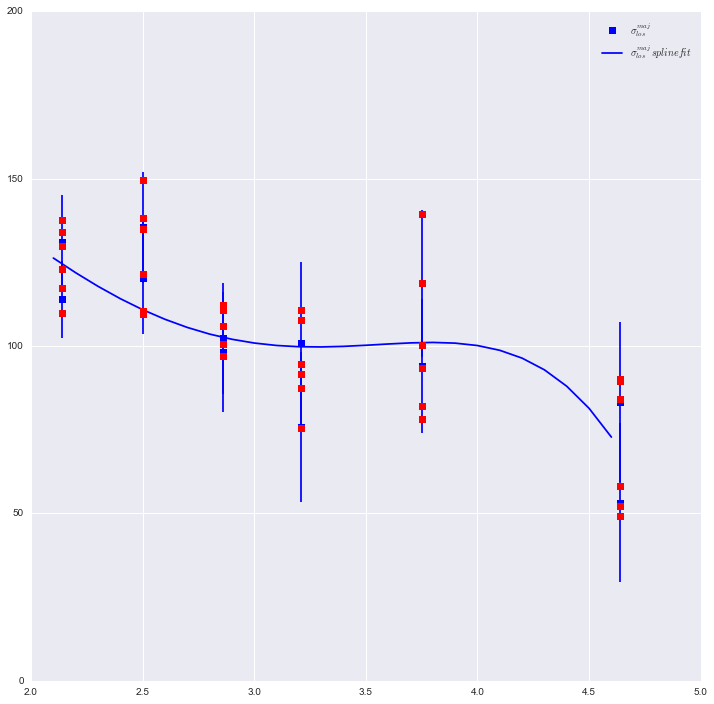

In [123]:
def gen_next_normal(radii, sig, esig):
    randomDelta =  np.array([np.random.normal(0., derr/2, 1)[0] for derr in esig] ) 
    randomdataY = sig + randomDelta
    return zip(radii, randomdataY)

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='blue')
 
for i in range(3):
    r, s = zip(*gen_next_normal(radii_maj, sig_maj_p, e_sig_maj_p))
    plt.plot(r, s, 's', color='red')

plt.ylim(0., 200.)
plt.legend()
plt.show()

In [124]:
import time
N = 10000
result = []
start_time = time.time()

radii_maj1, sig_maj_p1, e_sig_maj_p1 = radii_maj, sig_maj_p, e_sig_maj_p
radii_min1, sig_min_p1, e_sig_min_p1 = radii_min, sig_min_p, e_sig_min_p

for i in log_progress(range(N)):
    global spl_maj, spl_min
    global radii_min, radii_maj, sig_min_p, sig_maj_p, sig_min_0

    r, s = zip(*gen_next_normal(radii_maj1, sig_maj_p1, e_sig_maj_p1))
    spl_maj = inter.UnivariateSpline(r[1:], s[1:], k=3, s=10000.)

    radii_maj, sig_maj_p = r, s

    r, s = zip(*gen_next_normal(radii_min1, sig_min_p1, e_sig_min_p1))
    spl_min = inter.UnivariateSpline(r[1:], s[1:], k=3, s=10000.)
    sig_min_0 = spl_min(radii_min[0])

    radii_min, sig_min_p = r, s

#         res = opt.minimize(chisqfunc, x0, bounds=[(sigmas[0], sigmas[-1]), (alphas[0], alphas[-1])], method='L-BFGS-B')
    res = opt.minimize(chisqfunc, x0, bounds=[(sigmas[0], sigmas[-1]), (0, alphas[-1])], method='L-BFGS-B')
    result.append(res.x)
print("--- %s seconds ---" % (time.time() - start_time))
    
radii_maj, sig_maj_p, e_sig_maj_p = radii_maj1, sig_maj_p1, e_sig_maj_p1
radii_min, sig_min_p, e_sig_min_p = radii_min1, sig_min_p1, e_sig_min_p1

--- 733.721000195 seconds ---


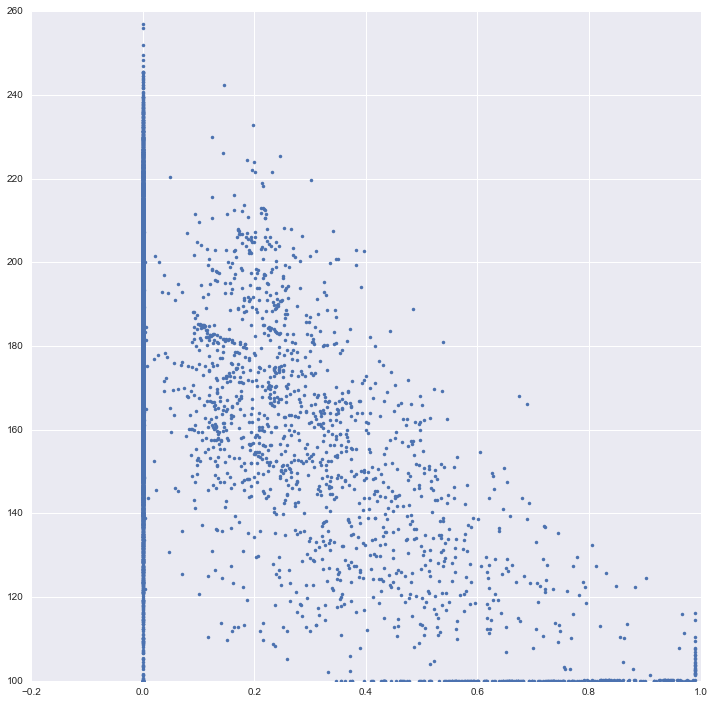

In [127]:
sig_min_0 = spl_min(r_eb)

s,a = zip(*result)
plt.plot(a, s, '.')
# plt.plot(alphas, map(main_slice, alphas), '--')
# plt.xlim(0.0, 0.99)
# plt.ylim(0, 150)
plt.show()

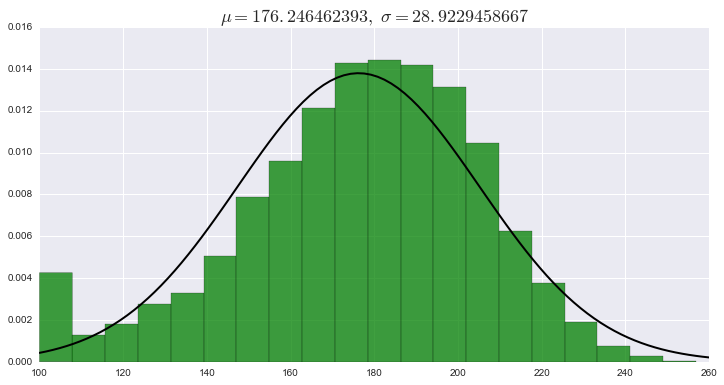

In [128]:
from scipy.stats import norm

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(s, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(s)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()

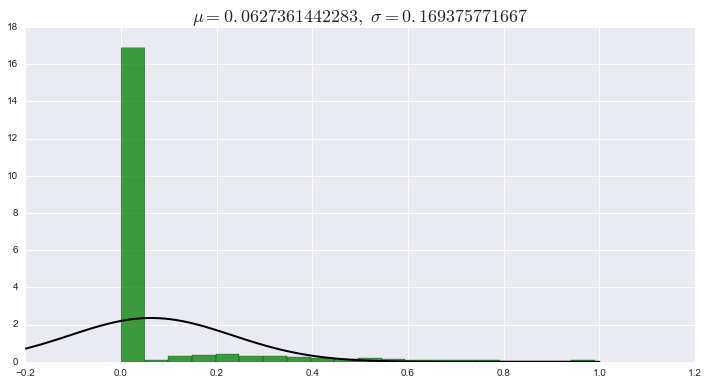

In [129]:
from scipy.stats import norm

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(a, 20, normed=1, facecolor='green', alpha=0.75)
mu, std = norm.fit(a)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

ax.set_title('$\mu=%s,\ \sigma=%s$' % (mu, std), fontsize=18)
ax.grid(True)

plt.show()